# Ames Housing Prices: Advanced Regression

# Definition

Housing markets are incredibly competitive. I am experiencing this first hand as I am trying to become a first-time home owner. I am interested in the application of machine learning techniques in context of housing markets to gain a competitive edge and use the abundance of data asscoiated with housing market to my advantage. Using a dataset of 79 characteristics (variables) of nearly 1500 homes in the Ames, Iowa area a potential home seller or buyer could possibly influence price negotiations of a house by examining more than just the number of bedrooms, number of bathrooms and square footage of a particular house. The Ames Housing dataset was compiled by Dean De Cock for use in data science education. The Kaggle competition and dataset details can be found at https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Problem Statement

The problem setforth is utilizing this housing dataset to its maximum potential by building a model to accurately predict house prices. This strategy has many critical components in order to be successful including feature selection, model selection and model tuning. Being able to  identify the optimal features through the use of data exploration to identify patterns, correlations and feature engineering to determine the appropriate inputs for the model is a crucial aspect in concert with slecting an appropriate model and tuning it to be robust and reliable. My initial approach to the problem was the senario given a real estate ad with the most commonly listed features and attributes and no price, could a machie learning algorithm accurately predict a price or competitive counter offer given data from the surrounding geographic area. The expected solution will be a robust supervised learning model that is capable of predicting housing prices given a dataset of features.

## Metrics

The performance metric best suited for this type of advanced regression model is Root-Mean-Squared-Error (RMSE). The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model's predicted values. Taking the RMSE between the logarithm of the predicted value and the logarithm of the observed sales price. Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Load the Ames housing data
data = pd.read_csv('train.csv')
prices = data['SalePrice']
features = data.drop('SalePrice', axis = 1)

# Print brief overview of dataset
print "Ames housing dataset has {} data points with {} variables each.".format(*data.shape)

# Any results you write to the current directory are saved as output.

Ames housing dataset has 1460 data points with 81 variables each.


# Analysis

## Data Exploration
`If a dataset is present, features and calculated statistics relevant to the problem have been reported and discussed, along with a sampling of the data. In lieu of a dataset, a thorough description of the input space or input data has been made. Abnormalities or characteristics about the data or input that need to be addressed have been identified.`

Given the problem domain is relative sale prices of homes based on a calculated subset of features, elementary statistics of the housing data will be useful to analyze various prediction results from the implemented model. Statistics to be claculated include minimum price, maximum price, mean price, median price and the standard deviation.

In [3]:
# Minimum price of the data
minimum_price = prices.min()

# Maximum price of the data
maximum_price = prices.max()

# Mean price of the data
mean_price = prices.mean()

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = prices.std()

# Show the calculated statistics
print "Statistics for Ames housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Ames housing dataset:

Minimum price: $34,900.00
Maximum price: $755,000.00
Mean price: $180,921.20
Median price $163,000.00
Standard deviation of prices: $79,442.50


In [4]:
features.describe()

/home/dbuczek/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


## Feature Observation
Description of the features and their respective value ranges can be found in the data_description.txt file 

In [5]:
data.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

## Exploratory Visualization
`A visualization has been provided that summarizes or extracts a relevant characteristic or feature about the dataset or input data with thorough discussion. Visual cues are clearly defined.`

In order to better understand the target output value `'SalePrice'`, I have included some visualizations including a simple bar graph visualization of the values from the column labeled `'SalePrice'` in the training dataset. As well as a heat map to get a high level overview of which features in the dataset correlate highly with `'SalePrice'` to guide further feature observation and engineering.

In [6]:
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

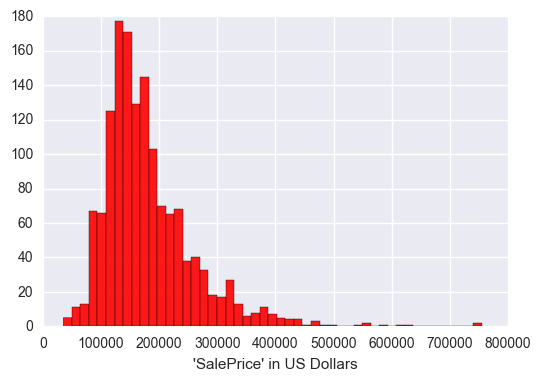

In [7]:
# Generate distribution plot of 'SalePrice' in US Dollars
dist_plot = sbn.distplot( data['SalePrice'], axlabel = "'SalePrice' in US Dollars", kde = False, color = 'r', hist_kws={'alpha': 0.9})

# Save high resolution image of plot for report
plt.savefig("fig1.png")

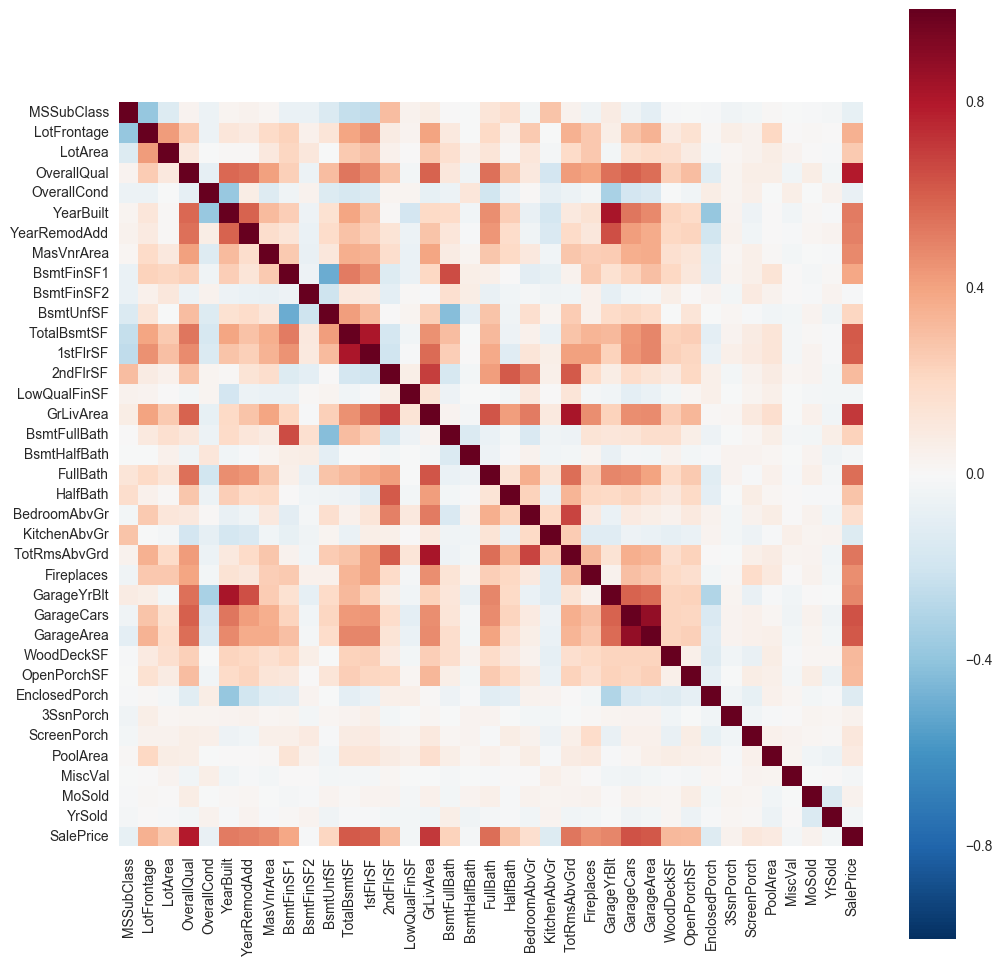

In [8]:
corr = data.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sbn.heatmap(corr, vmax=1, square=True)

# Save high resolution image of heatmap for report
plt.savefig("fig2.png")

In [9]:
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features in descending order by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features in descending order by their correlation with Sale Price:

OverallQual: 	0.790981600584
GrLivArea: 	0.708624477613
GarageCars: 	0.640409197258
GarageArea: 	0.623431438918
TotalBsmtSF: 	0.613580551559
1stFlrSF: 	0.605852184692
FullBath: 	0.560663762748
TotRmsAbvGrd: 	0.533723155582
YearBuilt: 	0.522897332879
YearRemodAdd: 	0.507100967111
GarageYrBlt: 	0.486361677488
MasVnrArea: 	0.477493047096
Fireplaces: 	0.466928836752
BsmtFinSF1: 	0.386419806242
LotFrontage: 	0.351799096571
WoodDeckSF: 	0.324413444568
2ndFlrSF: 	0.319333802832
OpenPorchSF: 	0.315856227116
HalfBath: 	0.284107675595
LotArea: 	0.263843353871
BsmtFullBath: 	0.227122233131
BsmtUnfSF: 	0.214479105547
BedroomAbvGr: 	0.168213154301
KitchenAbvGr: 	-0.135907370842
EnclosedPorch: 	-0.128577957926
ScreenPorch: 	0.111446571143
PoolArea: 	0.0924035494919
MSSubClass: 	-0.0842841351266
OverallCond: 	-0.0778558940487
MoSold: 	0.0464322452238
3SsnPorch: 	0.0445836653357
YrSold: 	-0.0289225851687
LowQualFinS

## Feature Observation
- `'OverallQual'` is  the Rating of the overall material and finish of the house (1-10, Very Poor to Very Excellent)
- `'GrLiveArea'` is above grade (ground) living area square feet
- `'GarageCars'` is size of garage in car capacity
- `'GarageArea'` is size of garage in square feet
- `'TotalBsmtSF'` is total square feet of basement area
- `'1stFlrSF'` is first Floor square feet
- `'FullBath'` is full bathrooms above grade
- `'TotRmsAbvGrd'` is total rooms above grade (does not include bathrooms)
- `'YearBuilt'` is the original construction date
- `'YearRemodAdd'` is remodel date (same as construction date if no remodeling or additions)

To most effetively select features to inform the model it is a reasonable approach to look at factors that realtors use to advertise properties for sale. By identifying key features that are most often found by looking at local newspaper ads, open house fliers and online listings we can gain insight into what features most likely influence 'SalePrice'. Looking at the top 10 features that correlate most (>0.50) highly with 'SalePrice' several features are highly correlated amongst certain descriptive categories such as Garage space wich contains attributes 'GarageCars' and 'GarageArea'. The correlation graphs and data above along with my intuition and sampling of various physical and online real estate ads should allow for a initial reduction in the feature set for ease of analysis and model building to ensure changes and optimizations are generating reasonable outputs. It is ideal to start with a simpler model with less features initially to make sure the data pipeline is functional and reliable. After the initial model is proven robust it could then be revisited and made more complex by adding additional features to the model. The features chosen for an initial analysis include `'OverallQual'`, `'GrLiveArea'`, `'GarageCars'`, `'FullBath'` and `'TotRmsAbvGrd'`.

- `'OverallQual'` was chosen because it is a numerical value that is a good overall indicator of quality. At a quick glance a realtor could give a score from (1-10) and the buyer would have a general impression of the house. This feature is unique because it is subjective in nature and not normally an aspect that is advertised in a real estate ad.
- `'GrLiveArea'` was chosen because it is a numerical physical feature that is most commonly found when describing a house for sale in a real estate ad.
- `'GarageCars'` was chosen for similar reasons because it is a numerical physical feature that is commonly found when describing a house for sale in a real estate ad. It was chosen over `'GarageArea'` due to garage space most commonly referred to by number of cars and not square footage when referring to size.
- Both `'FullBath'` and `'TotRmsAbvGrd'` were chosen because these two features are the two biggest factors that dictate the sale price of a house.
All five features chosen represent important features of a house that would most commonly be found in a real estate ad that do not correlate too highly amongst each other.

## Algorithms and Techniques
Algorithms and techniques used in the project are thoroughly discussed and properly justified based on the characteristics of the problem.

For this particular regression type problem the algorithm most suited for the characteristics of this problem are decision trees. The goal of a decision tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. There are many advantages to using a decision tree for this particular problem because they are visual, simple to understand and easy to interpret. Additionally to implement a decision tree there is little data preparation to do which allows for faster iterations and more nimble and adaptable analysis. Decision trees are also easy to refine by augmenting  the minimum number of samples required at a leaf node or setting the maximum depth of the tree to avoid overfitting. There are some disadvantages to using decision trees including creating overly complex trees that do not generalize well. Decision trees are sensitive to small variations in data that may cause an entirely new tree to be created unecessarily.

## Benchmark
Student clearly defines a benchmark result or threshold for comparing performances of solutions obtained.

Additionally to appropriately benchmark the output prediction values from the model using the testing data set a reasonable metric for assessing performance would be to look at the statistical attributes of the dataset. For this specific type of problem domain of predicting housing prices a good attribute to determine the robustness of the model would be the percent difference in the average `'SalePrice'` frm the training data compared to the predictions from the model using the test data. 

To appropriately compare the performance of the model a benchmark result will be calculated using the Root-Mean-Squared-Error (RMSE). The benchmark results will be a score that indicates the absolute fit of the model to the data–how close the observed data points are to the model's predicted values. The benchmark will be comparing the average housing price from the subset of training data (`'benchmark_avg'`) and comparing it against the actual housing prices from the subset of the training data (`'y_train'`). The average housing price is chosen as a benchmark because housing prices a historically grouped by geographic areas and pricing can be generally associated to regional trends in the market. For the purposes of this project's scope assessing performance against a benchamrk scored against the average housing cost should be more than adaquate. As for the model predicted results (`'preds'`) that performance will be assessed directly from the known labels of the subset of the training data set that was split for testing (`'y_test'`) the model performance. A percent difference < 10% could be classifed as robust in terms of inital performance before any model tuning is applied.


In [10]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [11]:
from sklearn.metrics import mean_squared_error

def benchmark_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = mean_squared_error(y_true, y_predict)
    
    # Return the score
    return score


# Methodology

## Data Preprocessing
`All preprocessing steps have been clearly documented. Abnormalities or characteristics about the data or input that needed to be addressed have been corrected. If no data preprocessing is necessary, it has been clearly justified.` 

In order to implement the decision tree model the training data has to be processed. The first step in processing the data is creating a new data structure only containing the features selected from the feature observation section above. All five features are described with numeric values and are present for all 1460 data points in the training dataset. There are no obvious abnormalities or characteristics about the training dataset that needs to be addressed.

In [12]:
# Created a data structure with the reduced  training feature set labeled 'X'
X = pd.concat([data['OverallQual'], data['GrLivArea'], data ['GarageCars'], data['FullBath'], data['TotRmsAbvGrd']], axis=1)

# Used describe function on newly created dataset to verify all 1460 data points have corresponding features
X.describe()

,OverallQual,GrLivArea,GarageCars,FullBath,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,1.565068,6.517808
std,1.382997,525.480383,0.747315,0.550916,1.625393
min,1.000000,334.000000,0.000000,0.000000,2.000000
25%,5.000000,1129.500000,1.000000,1.000000,5.000000
50%,6.000000,1464.000000,2.000000,2.000000,6.000000
75%,7.000000,1776.750000,2.000000,2.000000,7.000000
max,10.000000,5642.000000,4.000000,3.000000,14.000000


In [13]:
# Created a data structure for the training labels called 'y_train'
y = data['SalePrice']

y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Implementation
`The process for which metrics, algorithms, and techniques were implemented with the given datasets or input data has been thoroughly documented. Complications that occurred during the coding process are discussed.`

To implement and train a model using the decision tree algorithm I followed several steps listed below:

 - Imported `'GridSearchCV'` from `'sklearn.metrics'` to find the optimal `'max_depth'` parameter for the decision tree. Grid search is a way of automatically testing multiple combinations of parameter tunes.
 - Imported `'DecisionTreeRegressor'` from `'sklearn.tree'` to create a decision tree regressor object.
 - Imported `'make_scorer'` from `'sklearn.metrics'` to create a scoring function object.
 - Created a dictionary for `'max_depth'` containg the values from 1 to 10.

#### Train/test Split
Performing a train/test split on a data set is important for many reasons. Firstly, it is necessary for a supervised learning model to train on a dataset with both features and correct labels. Scondly, it is necessary to test a supervised learning model on a portion of the dataset with features absent the correct labels. A train/test split allows the model to be trained on a portion of a dataset (80%) and then tested on the remaining (20%). Lastly, with a train/test dataset split you can go back and verify the model's performance by comparing the predicted label given a feature with the actual label. A train/test dataset split can be easily achieved by using cross_validation available the sklearn.

#### Complications
One complication I experienced during the coding of this project was the constant imcompatability of sklearn modules due to impending depreication. Working on this project over an extended period of time would cause some modules to become out of date and stop functioning properly. Modules would either produce errors or no output at all. The lesson I learned is to not update any packages or modules over the course of a single project or there will be headaches. :/

In [14]:
from sklearn import cross_validation

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.15, random_state = 0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


In [15]:
"""Create DataFrame called 'benchamark_avg' that contains the actual price from the subset of the training data
labels and a column of the statistical mean housing price from the subset of the traning data labels"""

avg_house_price = 180921
actual_house_price = y_train

benchmark_avg = pd.DataFrame({'avg_price': avg_house_price, 'actual_price': actual_house_price})

In [16]:
"""Calculate and return the performance score between `'avg_house_price'` and `'actual_house_price'`
values based on the metric chosen."""

np.log(benchmark_metric(benchmark_avg['avg_price'], benchmark_avg['actual_price']))

22.569296290272771

In [17]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Created a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state = 0)

    # Created a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': (1,2,3,4,5,6,7,8,9,10)}

    # Transformed 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Created the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [18]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

list = []

for i, price in enumerate(reg.predict(X_test)):
    # print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
    list.append(price)

y_predict = pd.DataFrame(list, columns=['SalePrice'])

In [19]:
np.log(benchmark_metric(y_test, y_predict))

20.801266239430866

## Refinement

The parameter `'max_depth'` controls the maximum depth of the tree. If a `'max_depth'` is not specified then nodes are expanded until all leaves of the decision tre are pure or until all leaves contain less than `'min_samples_split'` samples. Where `'min_samples_split'` is the minimum numbers of samples required to split an internal node. the `'max_depth'` parameter is a key factor in determining the bias-variance tradeoff. 

When the model is trained with a maximum depth of 1 it appears to suffer from high bias where it is underfit due to the model being too simple and unable to represent the complexity. When the model is trained with a maximum depth of 10 it appears to suffer from high variance where it is overfit because the decision tree is too large. At the maximum depth of 1 both the training and testing scores are low and at the maximum depth of 10 the training score is high while the testing score is low. 

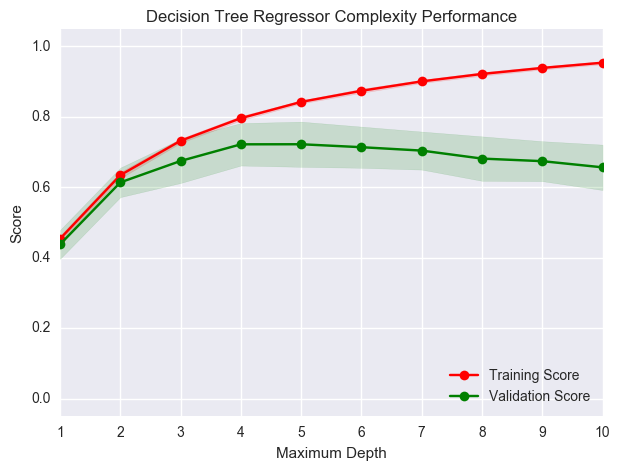

Parameter 'max_depth' is 5 for the optimal model.


In [20]:
import visuals as vs
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelComplexity(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

When the model is trained with a maximum depth of 1 it appears to suffer from high bias where it is underfit due to the model being too simple and unable to represent the complexity. When the model is trained with a maximum depth of 10 it appears to suffer from high variance where it is overfit because the decision tree is too large. At the maximum depth of 1 both the training and testing scores are low and at the maximum depth of 10 the training score is high while the testing score is low. I think a `'max_depth'` of 5 results in a model that best generalizes the unseen data because it appears tobe the sweet spot where it minimizes bias and variance due to model complexity. There is sufficient data to reduce bias and the error between the training and validation score is reasonable.

The final parameters used in the implemeted decision tree model are as follows:

 - `'max_depth'` = 5
 - `'min_samples_split'` = 2
 - `'random_state'` = 0

# Results

## Kaggle submission

In [21]:
# Load Ames Housing test dataset
all_test_data = pd.read_csv('test.csv')

# Print brief overview of test dataset
print "Ames housing dataset has {} data points with {} variables each.".format(*all_test_data.shape)

Ames housing dataset has 1459 data points with 80 variables each.


In [22]:
# Select the reduced dataset features
test_data = pd.concat([all_test_data['OverallQual'], all_test_data['GrLivArea'], all_test_data['GarageCars'], all_test_data['FullBath'], all_test_data['TotRmsAbvGrd']], axis=1)

preds = reg.predict(test_data)    
solution = pd.DataFrame({'id':all_test_data.Id, 'SalePrice': preds})

# Write to CSV file
filename = 'solution.csv'
solution.to_csv(filename, index=False)


## Model Evaluation and Validation
`The final model’s qualities — such as parameters — are evaluated in detail. Some type of analysis is used to validate the robustness of the model’s solution.`

I think a maximum depth of 5 results in an model that best generalizes the unseen data because that appears to be the sweet spot that minimizes bias and variance due to model complexity. There is sufficient data to reduce bias and the error between the training and validation score is reasonable. At a maximum depth of 5 the training and validation scores are trending close enough together to predict a reasonable `'SalePrice'` while also being able to provide a generalized model that is not to biased or over-fit to the training data and therfore I believe predicts useful results.

At this point there are diminishing returns from trying to replace a good learning algorithm with an exceptional one for this specific problem. Instead most of the improvements will come from feature engineering that will enable the learning system to extract more patterns and generalize more accurately.

## Justification 
`The final results are compared to the benchmark result or threshold with some type of statistical analysis. Justification is made as to whether the final model and solution is significant enough to have adequately solved the problem.`

Looking at the percent difference between the RMSE of the benchmark (training data and average house price values) and comparing them to the RSME of the prediction (actual house price and predicted values). The percent difference is small.

| RSME - Benchamrk | RSME - Prediction | % Difference |
| :---: | :---: | :---: |
| 22.57 | 20.80 | -7.842% |

## Visualization
Below are two tables showing 5 actual house prices with the predictions generated by the decision tree model. Across these 5 data samples the average percent difference is 

In [23]:
# Generates table of the first 5 data points in the given dataframe in this case the actual house price
y_test.head()

529    200624
491    133000
459    110000
279    192000
655     88000
Name: SalePrice, dtype: int64

In [27]:
# Generate table of the first 5 data points in the given dataframe in this cae the model predicted house price
y_predict.head()

,SalePrice
0,185660.192857
1,139033.108696
2,120937.825243
3,233164.552239
4,120937.825243


The table below represents the percent difference of actual house price and model predicted price in USD of 5 data points. Given such a small data sample it is hard to say conclusively that the model is perfect but the output is reasonable in terms of the features values for each particular case.

| Actual Price (USD) | Model Prediction (USD | % Difference |
| :---: | :---: | :---: |
| 200624 | 185660 | 7.74% |
| 133000 | 139033 | 4.43% |
| 110000 | 120937 | 9.47% |
| 192000 | 233164 | 19.36% |
| 88000 | 120937 | 31.52% |

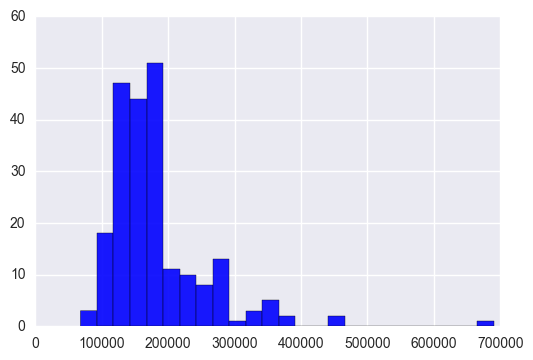

In [24]:
# Display previous graph from above depicting SalePrice data from the training dataset to compare with the testing dataset
sbn.distplot(y_predict, kde = False, color = 'b', hist_kws={'alpha': 0.9})

x-axis label: Sale Price (USD), y-axis label: Number of Houses

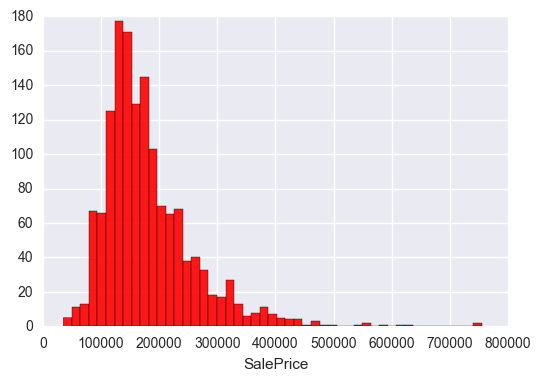

In [25]:
# Visualize the predicted SalePrice data from the implemented decision tree model
sbn.distplot(data['SalePrice'], kde = False, color = 'r', hist_kws={'alpha': 0.9})

x-axis label: Sale Price (USD), y-axis label: Number of Houses

At a high level both `'SalePrice'` graphs have a similar shape. Overall I think the comparison of the two graphs represents a rough although robust model for predicting housing prices given a set of engineered features for analysis. 

## Reflection
`Student adequately summarizes the end-to-end problem solution and discusses one or two particular aspects of the project they found interesting or difficult.`

Initially given a wide range of features that describe a given house it was relatively straight froward to identify and filter out the most relevant features that most highly correlated with the `'SalePrice'` of the house. Determining a benchmark to assess and engineer a robust model was one of the more difficult tasks of this project. The implemented solution involves a comparison between a benchmark score and a prediction score. The benchmark score is calculated by doing an RSME between the average `'SalePrice'` of a portion of the training set and comparing it to the actual `'SalePrice'` data. I took this approach for this particular problem due to the clustering behavior of real estate markets in a given geographical area. By comparing the average price to the actual price over a given geographical area you can get a baseline housing price range to gauge the robustness of the model's predictions. The score that is compared against the benchmark is calculated by looking at the output prediction from the model and comparing it to the actual `'SalePrice'` of the home from the other portion of the train_test data split. The final analysis was done by comparing the raw scores from the benchmark results and the prediction results and assessing performance based on percent difference. Initially a 10% threshold was used a metric of a successful and robust model given most housing prices are negotiable within that range.

After completion of this project an analysis of the results it bcame clear that the most important features to determine a given houses' price are more physical in nature and can be easily referenced on a realtors flyer posted outside the house for sale. Although there are many other factors a homebuyer may take into consideration such as location, neighborhood or school districts it is most benficial to consider features uch as overall quality, square footage, number of bedrooms and number a bathrooms when trying to determine the `'SalePrice'` of a house.

## Improvement

`Discussion is made as to how one aspect of the implementation could be improved. Potential solutions resulting from these improvements are considered and compared/contrasted to the current solution.`

One aspect of the implementation of the model that could be improved for further a nalysiswould be the use of something like a RandomForestRegressor in place of a heat map to determine optimal correlation of features to determine `'SalePrice'`. A random forest is a pre process estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. I chose the heat map to determine correlation due to its visual nature and how easy it is to interpret. Going beyod the scope of this project a random forest could provide a more rich analysis but lead to a similar outcome. A random forest could help with over-fitting and provide a wider range of prediction values given a  more diverse feature set.  I beleive the current implemtation of the model and feature set is robust enough to provide an initial set of reliable predictions.